In [1]:
# Calories Prediction Project with SVM

## 1. Import Libraries


# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set the style for seaborn
sns.set_style('whitegrid')

# For reproducibility
np.random.seed(42)

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\test\Downloads\calories.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
display(df.head())

Dataset shape: (15000, 9)

First 5 rows of the dataset:


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
# Check data types and missing values
print("\nData types and non-null counts:")
df.info()

print("\nCheck for missing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe().T


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB

Check for missing values:
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Basic statistics:


,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


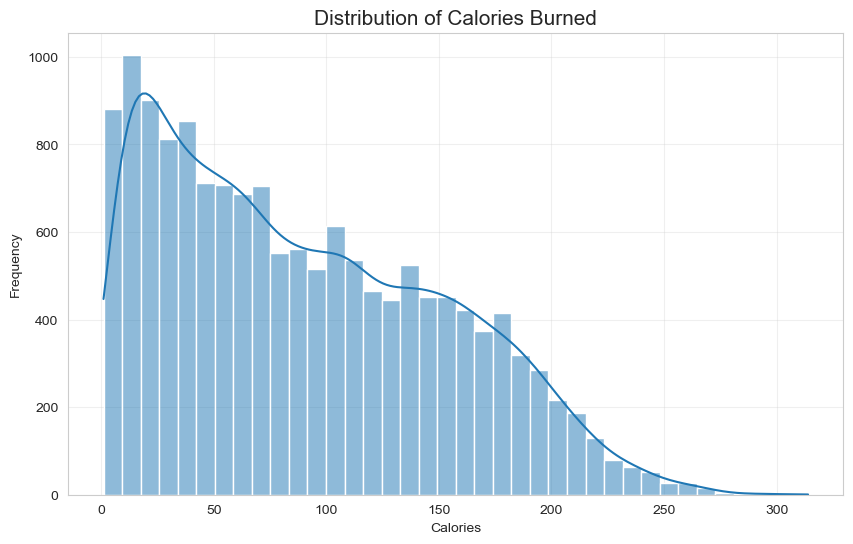

In [4]:
# Distribution of target variable (Calories)
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], kde=True)
plt.title('Distribution of Calories Burned', fontsize=15)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

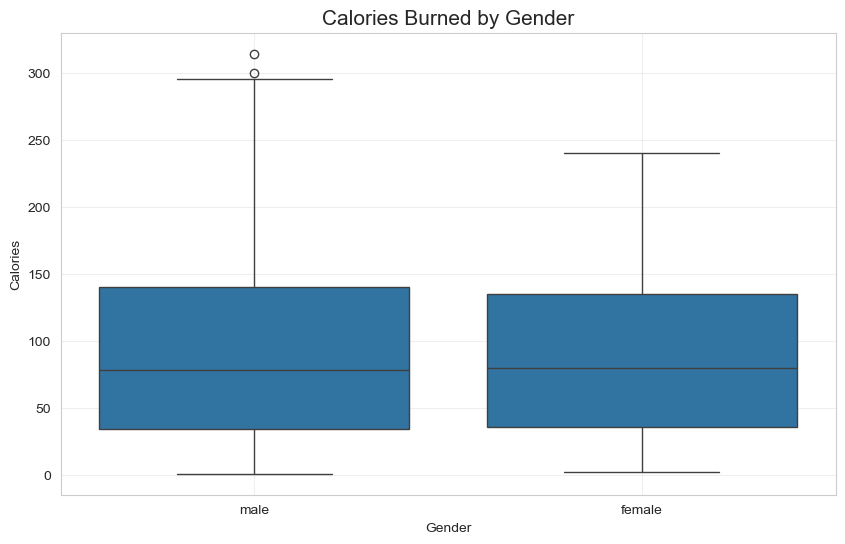

In [5]:
# Boxplot for Calories by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Calories', data=df)
plt.title('Calories Burned by Gender', fontsize=15)
plt.grid(True, alpha=0.3)
plt.show()

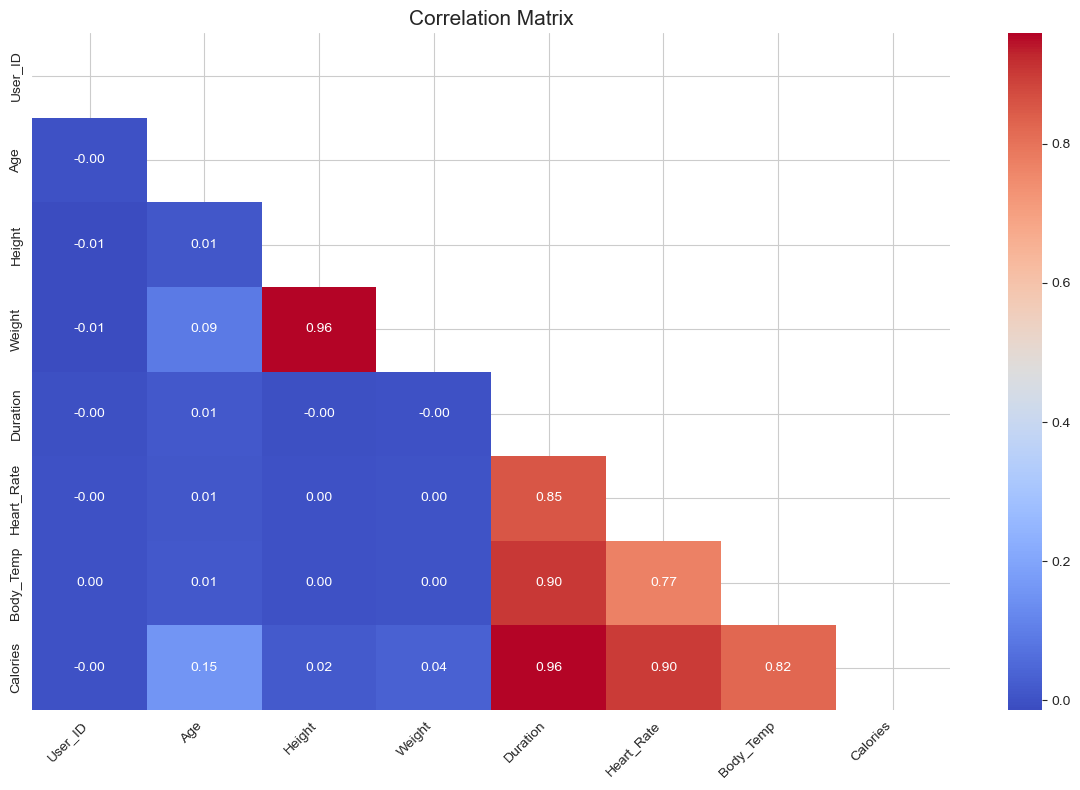

In [6]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

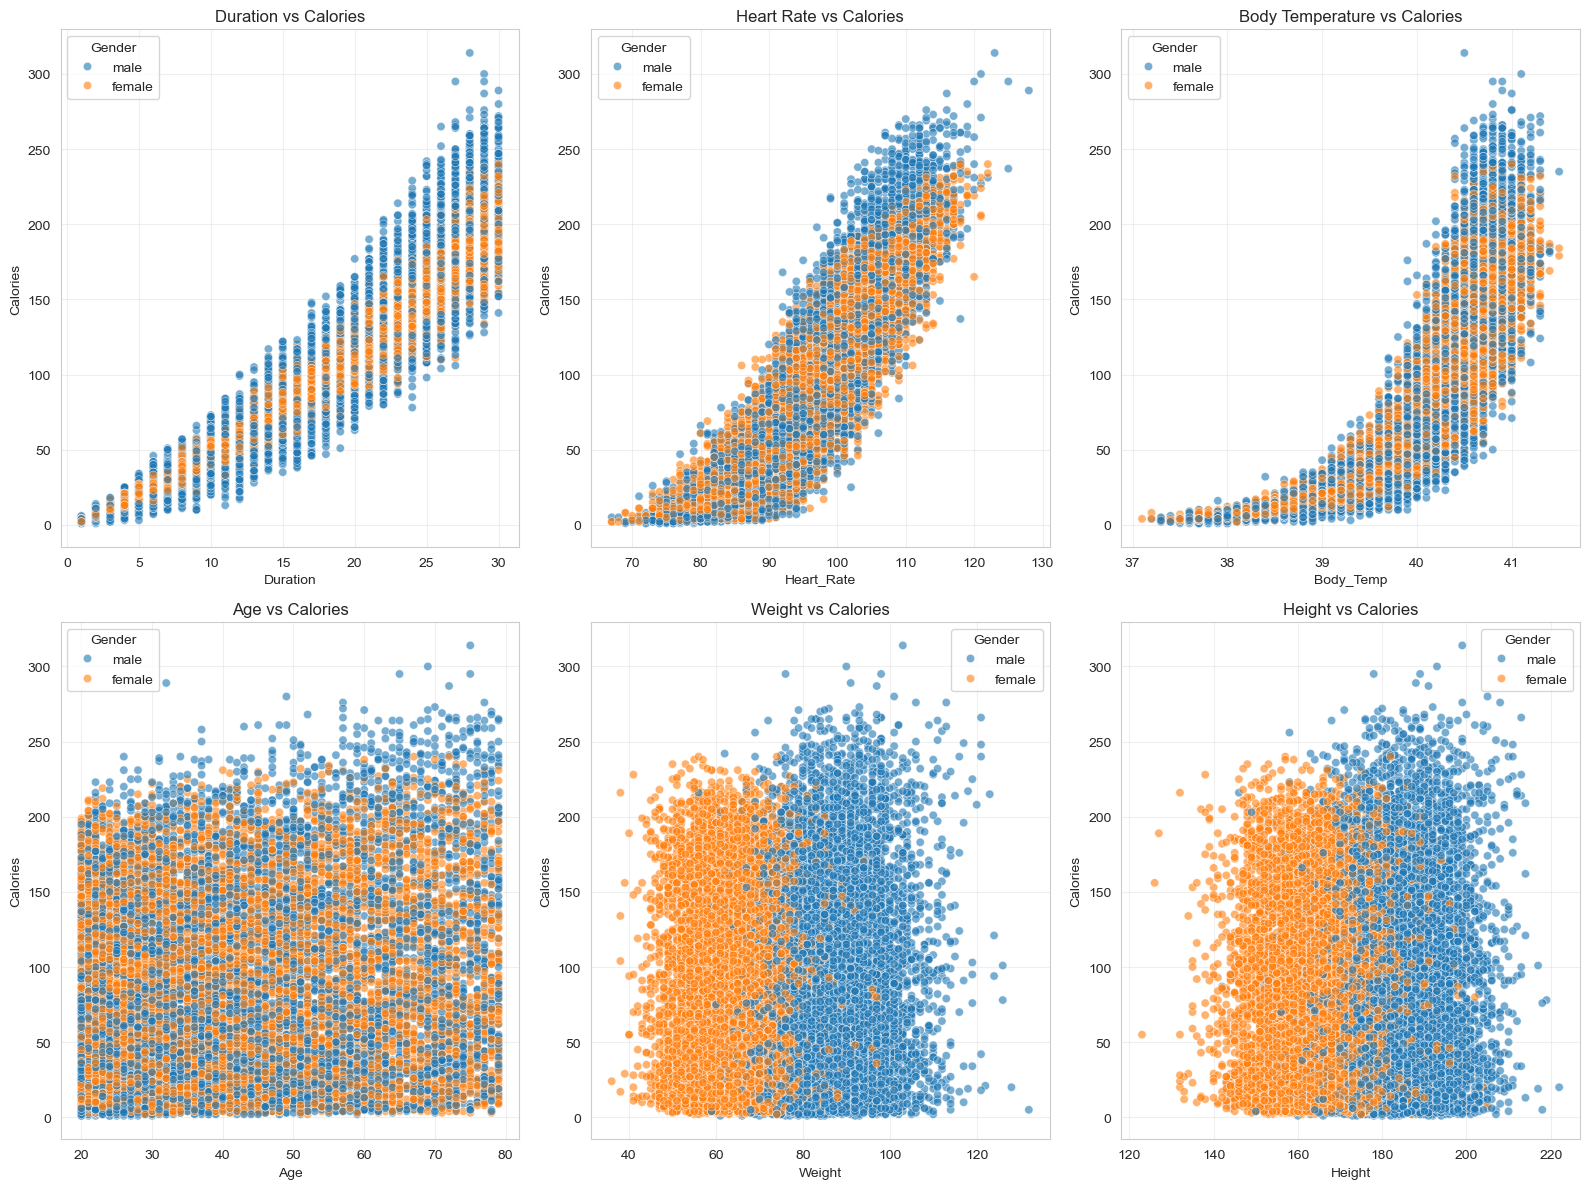

In [7]:
# Scatter plots of key features vs Calories
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
sns.scatterplot(x='Duration', y='Calories', hue='Gender', data=df, alpha=0.6)
plt.grid(True, alpha=0.3)
plt.title('Duration vs Calories', fontsize=12)

plt.subplot(2, 3, 2)
sns.scatterplot(x='Heart_Rate', y='Calories', hue='Gender', data=df, alpha=0.6)
plt.grid(True, alpha=0.3)
plt.title('Heart Rate vs Calories', fontsize=12)

plt.subplot(2, 3, 3)
sns.scatterplot(x='Body_Temp', y='Calories', hue='Gender', data=df, alpha=0.6)
plt.grid(True, alpha=0.3)
plt.title('Body Temperature vs Calories', fontsize=12)

plt.subplot(2, 3, 4)
sns.scatterplot(x='Age', y='Calories', hue='Gender', data=df, alpha=0.6)
plt.grid(True, alpha=0.3)
plt.title('Age vs Calories', fontsize=12)

plt.subplot(2, 3, 5)
sns.scatterplot(x='Weight', y='Calories', hue='Gender', data=df, alpha=0.6)
plt.grid(True, alpha=0.3)
plt.title('Weight vs Calories', fontsize=12)

plt.subplot(2, 3, 6)
sns.scatterplot(x='Height', y='Calories', hue='Gender', data=df, alpha=0.6)
plt.grid(True, alpha=0.3)
plt.title('Height vs Calories', fontsize=12)

plt.tight_layout()
plt.show()

In [8]:
# Separate features and target
X = df.drop('Calories', axis=1)
y = df['Calories']

# Remove User_ID as it's not a predictive feature
if 'User_ID' in X.columns:
    X = X.drop('User_ID', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (12000, 7)
Testing set size: (3000, 7)


In [9]:
# Create new features
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# BMI (Body Mass Index)
X_train_copy['BMI'] = X_train_copy['Weight'] / ((X_train_copy['Height']/100) ** 2)
X_test_copy['BMI'] = X_test_copy['Weight'] / ((X_test_copy['Height']/100) ** 2)

# Duration × Heart_Rate (proxy for exercise intensity)
X_train_copy['Duration_HeartRate'] = X_train_copy['Duration'] * X_train_copy['Heart_Rate']
X_test_copy['Duration_HeartRate'] = X_test_copy['Duration'] * X_test_copy['Heart_Rate']

# Dummy encode Gender manually
X_train_copy['Gender_male'] = (X_train_copy['Gender'] == 'male').astype(int)
X_test_copy['Gender_male'] = (X_test_copy['Gender'] == 'male').astype(int)
X_train_copy = X_train_copy.drop('Gender', axis=1)
X_test_copy = X_test_copy.drop('Gender', axis=1)

print("Features after engineering:")
X_train_copy.head()

Features after engineering:


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Duration_HeartRate,Gender_male
9839,37,179.0,77.0,7.0,81.0,39.5,24.031709,567.0,1
9680,23,195.0,87.0,26.0,110.0,40.5,22.879684,2860.0,1
7093,33,181.0,77.0,12.0,88.0,40.1,23.503556,1056.0,1
11293,66,156.0,54.0,9.0,77.0,39.5,22.189349,693.0,0
820,32,144.0,49.0,5.0,90.0,39.0,23.630401,450.0,0


In [10]:
# Apply scaling to all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_copy)
X_test_scaled = scaler.transform(X_test_copy)

# Convert scaled arrays back to dataframes with feature names
feature_names = X_train_copy.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

print("Scaled features:")
X_train_scaled_df.head()

Scaled features:


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Duration_HeartRate,Gender_male
0,-0.337295,0.323232,0.139551,-1.021889,-1.517377,-0.671031,-0.200045,-1.058257,1.007193
1,-1.163322,1.447924,0.805955,1.266663,1.522425,0.614490,-0.939280,1.420921,1.007193
2,-0.573303,0.463818,0.139551,-0.419638,-0.783631,0.100281,-0.538952,-0.529553,1.007193
3,1.373763,-1.293513,-1.393179,-0.780988,-1.936660,-0.671031,-1.382256,-0.922027,-0.992859
4,-0.632304,-2.137032,-1.726381,-1.262789,-0.573990,-1.313791,-0.457558,-1.184757,-0.992859


In [11]:
# Basic SVR model
svr = SVR()
svr.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

# Evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")

Training RMSE: 5.65
Testing RMSE: 5.36
Training R²: 0.9917
Testing R²: 0.9929
Training MAE: 2.32
Testing MAE: 2.38


In [12]:
# Parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.01, 0.1, 0.2]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE: {-grid_search.best_score_:.2f}")

# Best model
best_svr = grid_search.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
Best RMSE: 0.54


In [13]:
# Predictions with best model
y_train_pred_best = best_svr.predict(X_train_scaled)
y_test_pred_best = best_svr.predict(X_test_scaled)

# Evaluation metrics for best model
train_rmse_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
train_r2_best = r2_score(y_train, y_train_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)
train_mae_best = mean_absolute_error(y_train, y_train_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)

print(f"Best Model - Training RMSE: {train_rmse_best:.2f}")
print(f"Best Model - Testing RMSE: {test_rmse_best:.2f}")
print(f"Best Model - Training R²: {train_r2_best:.4f}")
print(f"Best Model - Testing R²: {test_r2_best:.4f}")
print(f"Best Model - Training MAE: {train_mae_best:.2f}")
print(f"Best Model - Testing MAE: {test_mae_best:.2f}")

Best Model - Training RMSE: 0.49
Best Model - Testing RMSE: 0.47
Best Model - Training R²: 0.9999
Best Model - Testing R²: 0.9999
Best Model - Training MAE: 0.35
Best Model - Testing MAE: 0.35


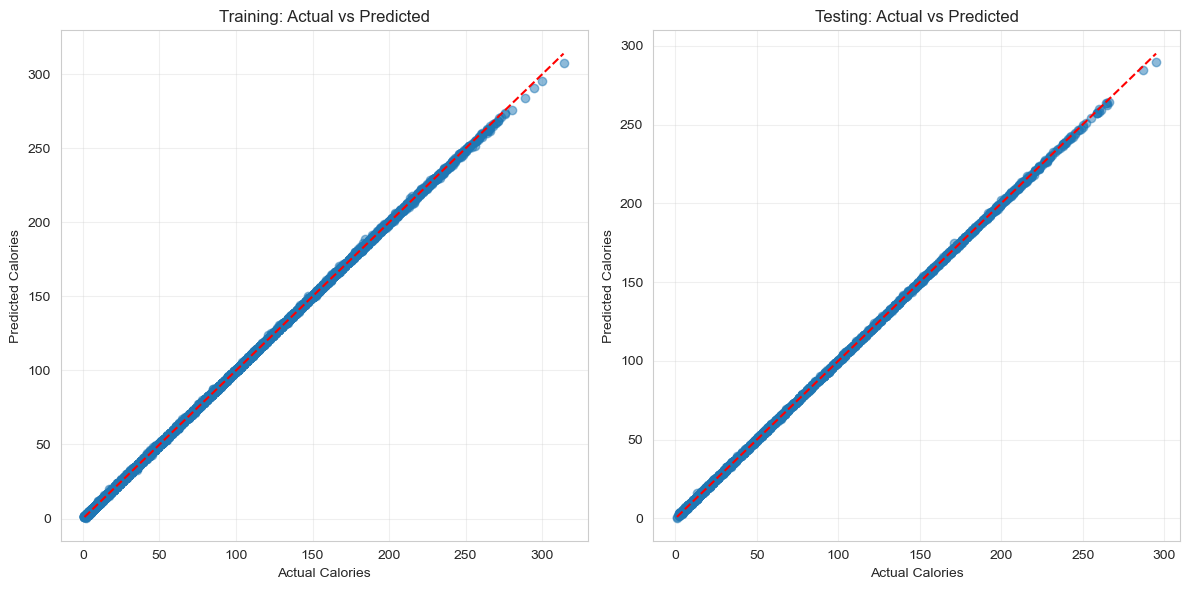

In [14]:
# Visualize actual vs predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_best, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Training: Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Testing: Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

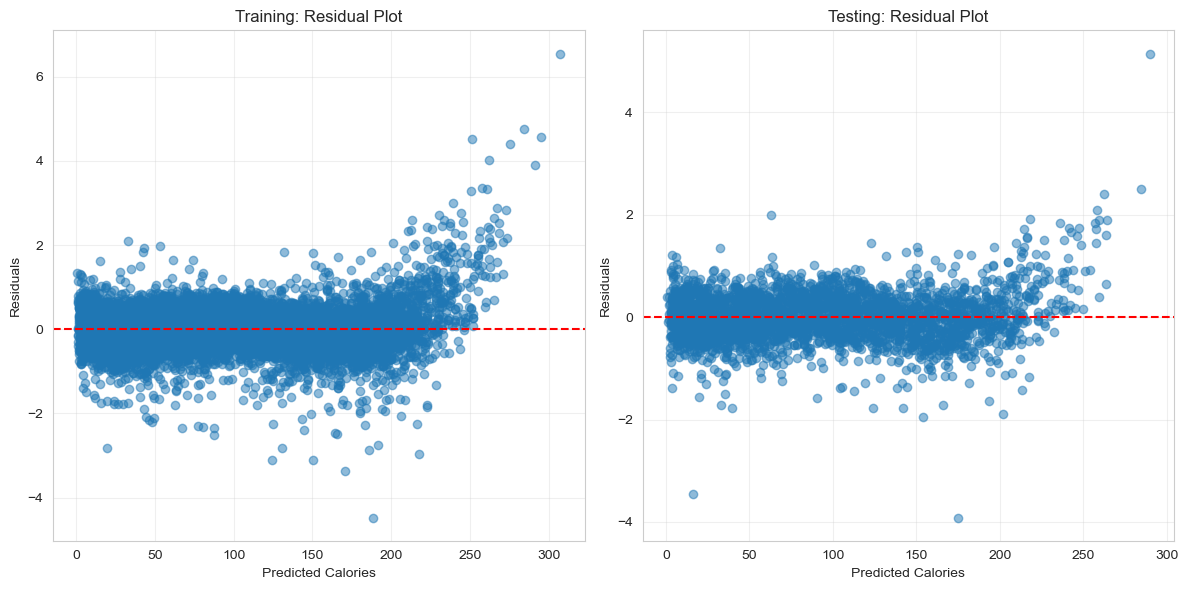

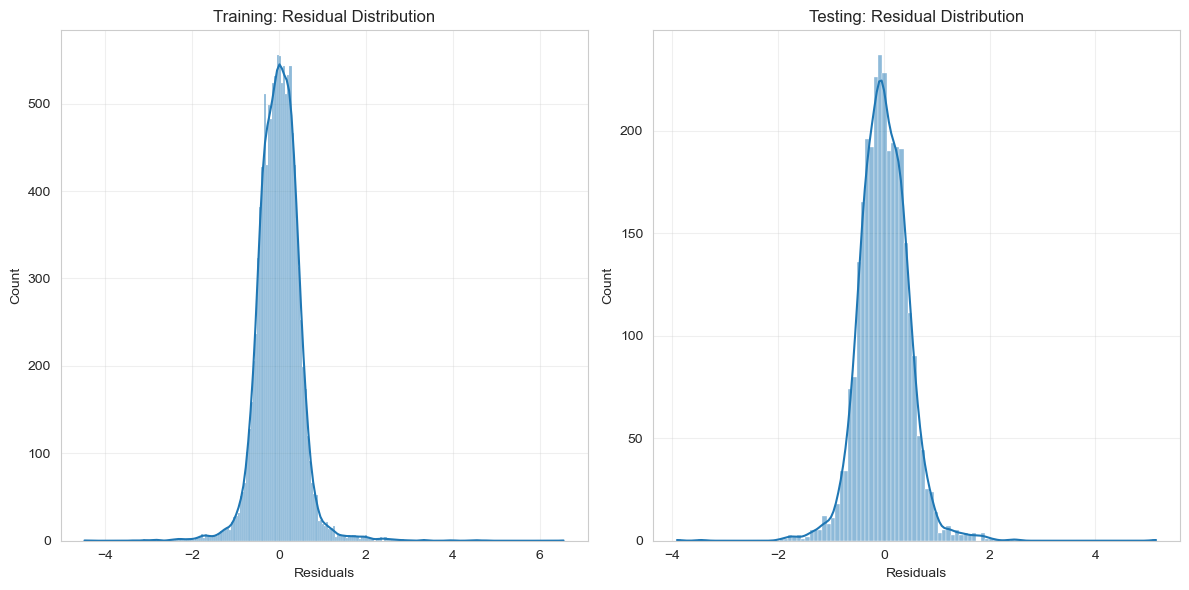

In [15]:
# Residual analysis
plt.figure(figsize=(12, 6))

# Training residuals
train_residuals = y_train - y_train_pred_best
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_best, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals')
plt.title('Training: Residual Plot')
plt.grid(True, alpha=0.3)

# Testing residuals
test_residuals = y_test - y_test_pred_best
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_best, test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals')
plt.title('Testing: Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Distribution of residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Training: Residual Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Testing: Residual Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
# Summary DataFrame
model_summary = pd.DataFrame({
    'Metric': ['RMSE', 'R²', 'MAE'],
    'Training': [train_rmse_best, train_r2_best, train_mae_best],
    'Testing': [test_rmse_best, test_r2_best, test_mae_best]
})

print("Final Model Performance Summary:")
display(model_summary)

print("\nConclusion:")
print(f"The SVM model with {best_svr.kernel} kernel achieved an R² of {test_r2_best:.4f} on the test set.")
print(f"This means it explains approximately {test_r2_best*100:.1f}% of the variance in calorie expenditure.")
print(f"The average prediction error is {test_mae_best:.1f} calories.")

Final Model Performance Summary:


,Metric,Training,Testing
0,RMSE,0.485806,0.474982
1,R²,0.999939,0.999944
2,MAE,0.349930,0.351467



Conclusion:
The SVM model with rbf kernel achieved an R² of 0.9999 on the test set.
This means it explains approximately 100.0% of the variance in calorie expenditure.
The average prediction error is 0.4 calories.
